In [60]:
from pathlib import Path
import json
import pandas as pd

path = Path('../reports')

# get folders from path
folders = [x for x in path.iterdir() if x.is_dir()]

# in the folders are multiple json files. 
# Create a dataframe that contains in every row the data from the json files named "synthetic.json".

df = pd.DataFrame()
for folder in folders:
    files = [x for x in folder.iterdir() if x.is_file()]
    for file in files:
        with open(file) as json_file:
            data = json.load(json_file)
            data = {k: v for k, v in data.items() if k in ['metrics', 'data stats']}
            data = pd.json_normalize(data, meta=['metrics', 'data stats'])
            # add column for whether the folder name contains GCNSI or not
            data['type'] = ('GCNSI' if 'GCNSI' in folder.name else "GCNR") + " " +('syn' if "synthetic" in file.name else "real")
            data["model"] = ("GCNSI" if "GCNSI" in folder.name else "GCNR")
            df = df.append(data, ignore_index=True)
            

In [ ]:
metrics = [avg rank of source]

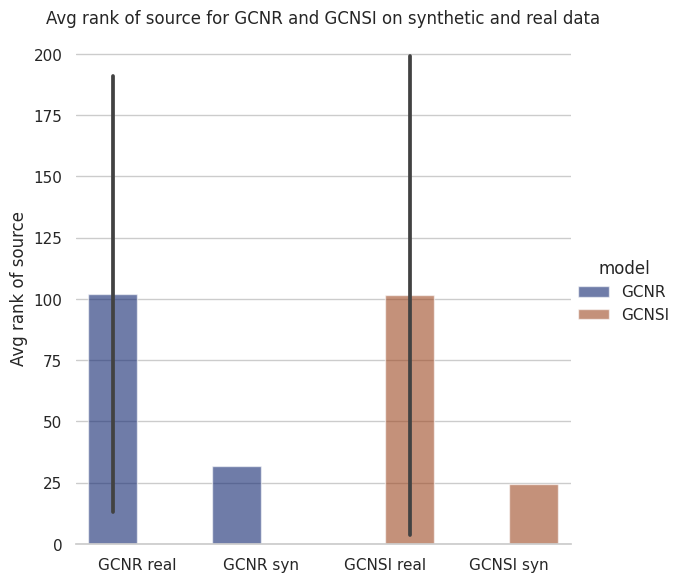

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=df, kind="bar",
    x="type", y="supervised.avg rank of source", hue="model",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Avg rank of source")
plt.title("Avg rank of source for GCNR and GCNSI on synthetic and real data")
plt.show()